In [27]:
#Import neccessary modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
print("Imported modules successfully")

Imported modules successfully


In [7]:
#Load the dataset into X and y
dataset = load_iris()
X = np.array(dataset['data'])
y = np.array(dataset['target'])

#Get the attributes(the names of the X columns and all unique species)
attributes = list(dataset['feature_names'])
flower_types = list(dataset['target_names'])

#Print out all the results
print(X.shape)
print(y.shape)
print(X[0])
print(y[0])
print(attributes)
print(flower_types)

(150, 4)
(150,)
[5.1 3.5 1.4 0.2]
0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


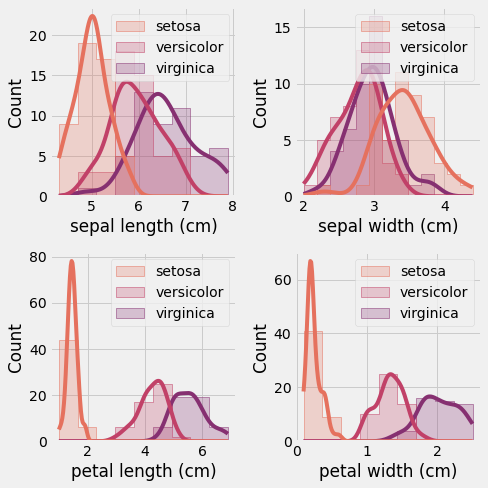

In [28]:
#Visualize the features of the plant

style.use('fivethirtyeight')
y_flower = [flower_types[i] for i in y]
fig, ax = plt.subplots(2, 2, figsize=(7,7))
current_index = 0
for i in range(2):
    for j in range(2):
        the_data = X[:,current_index]
        sns.histplot(ax=ax[i][j], x=the_data, hue=y_flower, kde=True, element="step", palette="flare")
        ax[i][j].set_xlabel(attributes[current_index])
        current_index += 1
fig.tight_layout()
plt.show()

In [29]:
#Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(112, 4) (38, 4)
(112,) (38,)


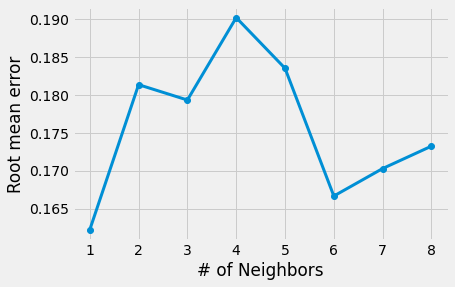

In [40]:
#Make a function that gives an accuracy of a KNeighborsRegressor model given n_neighbors
def model_error(n_neighbors):
    model = KNeighborsRegressor(n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_pred, y_test))
    return error

#Test the function on various neighbors
all_neighbors = [n for n in range(1,9)]
accuracies = [model_error(n) for n in all_neighbors]

#Visualize the results
plt.plot(all_neighbors, accuracies, marker='o', linewidth=3)
plt.xlabel('# of Neighbors')
plt.ylabel('Root mean error')
plt.show()

In [45]:
#From the graph, we can see that having one neighbor harbors the least error. So, our final model will have 1 neighbor

model = KNeighborsRegressor(n_neighbors=1)
model.fit(X, y)

#Testing the model on various points

def predict_flower_type(x):
    y_pred = model.predict([x])[0]
    flower_type = flower_types[int(np.round(y_pred))]
    return flower_type

print(predict_flower_type([5, 3.5, 1, 0.5]))
print(predict_flower_type([5.5, 3, 4, 1.5]))
print(predict_flower_type([6.5, 3, 5, 2]))

setosa
versicolor
virginica
